Welcome to my notebook! This is a copy/paste welcome message for all my notebooks :)
📓 This repository/notebook serves as a personal reminder for me, 
documenting code snippets and techniques sourced from various learning resources. 
The goal is to consolidate valuable information and create a basic reference guide. 
Please note that the codes included here are not originally mine, and credit goes 
to the respective authors and resources. Feel free to explore and 
use this collection as a shared learning space. Happy coding

#### Sources for this notebook : 
    * https://github.com/PacktPublishing/PyTorch-Computer-Vision-Cookbook/tree/master/Chapter04
    * https://amd.grand-challenge.org/
    * http://ai.baidu.com/broad/download
    
#### Purpose :
    * single object detection by Pytorch.
    
#### Keywords :
    * object detection
    * IOU metric
    * data transform for obj det.

In [1]:
import os
import pandas as pd

path2data="./data_sng_det/"

# full path of labels file
path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

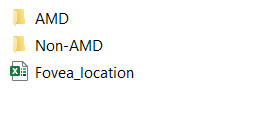

In [2]:
path2labels

'./data_sng_det/Training400\\Fovea_location.xlsx'

In [4]:
labels_df=pd.read_excel(path2labels,index_col="ID")

labels_df.head()

imgName      Fovea_X      Fovea_Y
ID                                     
1   A0001.jpg  1182.264278  1022.018842
2   A0002.jpg   967.754046  1016.946655
3   A0003.jpg  1220.206714   989.944033
4   A0004.jpg  1141.140888  1000.594955
5   A0005.jpg  1127.371832  1071.109440

In [5]:
labels_df.tail()

imgName     Fovea_X     Fovea_Y
ID                                    
396  N0307.jpg  823.024991  690.210211
397  N0308.jpg  647.598978  795.653188
398  N0309.jpg  624.571803  755.694880
399  N0310.jpg  687.523044  830.449187
400  N0311.jpg  746.107631  759.623062

 89 AMD, 311 Non-AMD... Total 400 images... All image names and centroid locations of fovea are in excel file, as you can see at labels_df 

<Axes: xlabel='Fovea_X', ylabel='Fovea_Y'>

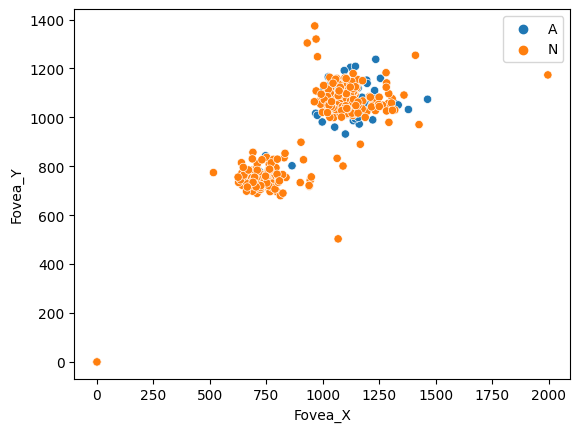

In [6]:
import seaborn as sns

AorN=[imn[0] for imn in labels_df.imgName]
sns.scatterplot(x=labels_df['Fovea_X'], y=labels_df['Fovea_Y'],hue=AorN)

take the first letter of images for classification and show their centroids above...for visualization of data


In [7]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# fix random seed
np.random.seed(2019)
plt.rcParams['figure.figsize'] = (15, 9)
plt.subplots_adjust(wspace=0, hspace=0.3)
nrows,ncols=2,3

<Figure size 1500x900 with 0 Axes>

In [8]:
# get imgName column
imgName=labels_df["imgName"]

# get ids
ids=labels_df.index

# select random ids
rndIds=np.random.choice(ids,nrows*ncols)
print(rndIds)

[ 73 371 160 294 217 191]


In [9]:
def load_img_label(labels_df,id_):    
    imgName=labels_df["imgName"]    
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
            
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
    img = Image.open(fullPath2img)
    
    # centroid
    x=labels_df["Fovea_X"][id_]
    y=labels_df["Fovea_Y"][id_]
    
    label=(x,y)
    return img,label

In [10]:
def show_img_label(img,label,w_h=(50,50),thickness=2):   
    w,h=w_h                   
    cx,cy=label
    
    # draw a rectangle 
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="green",width=thickness)

    plt.imshow(np.asarray(img))

(2124, 2056) (1037.89889229694, 1115.71768088143)
(1444, 1444) (635.148992978281, 744.648850248249)
(1444, 1444) (639.360312038611, 814.762764100936)
(2124, 2056) (1122.08407442503, 1067.58829793991)
(2124, 2056) (1092.93333646222, 1055.15333296773)
(2124, 2056) (1112.50135915347, 1070.7251775623)


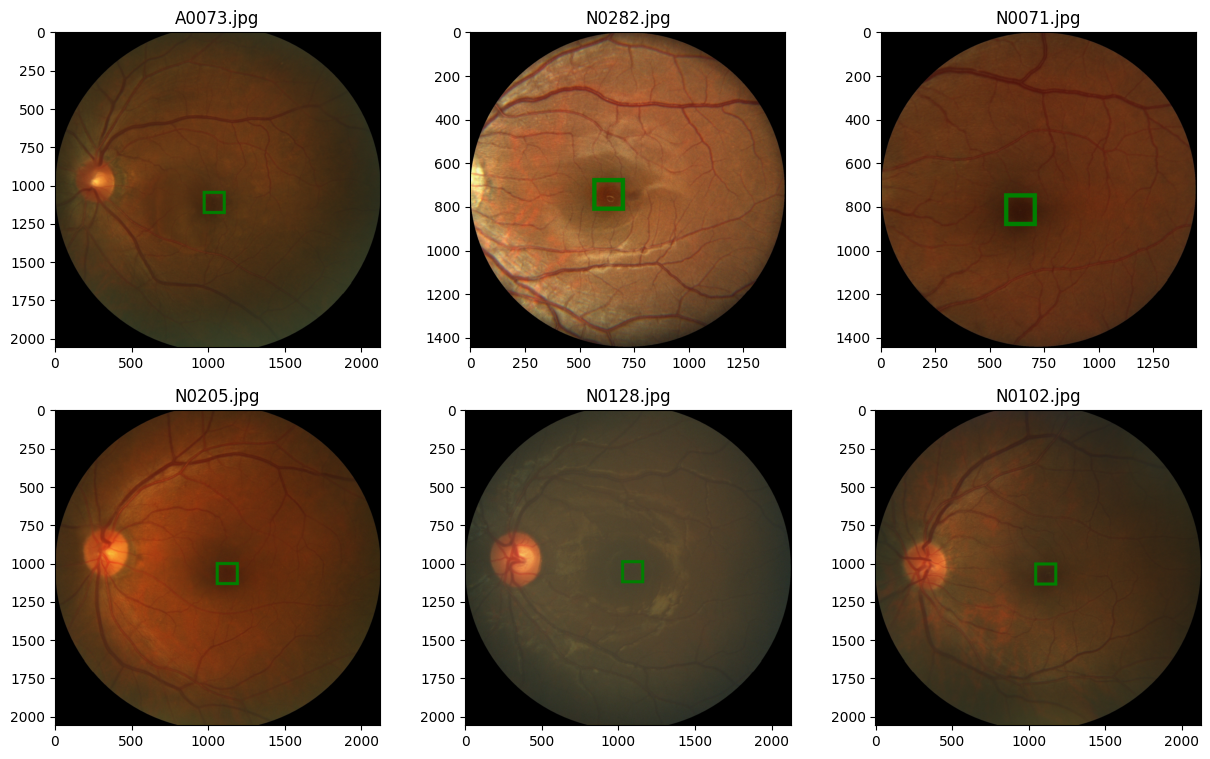

In [11]:
for i,id_ in enumerate(rndIds):
    
    img,label=load_img_label(labels_df,id_)   
    print(img.size,label)
    
    plt.subplot(nrows, ncols, i+1) 
    show_img_label(img,label,w_h=(150,150),thickness=20)
    plt.title(imgName[id_])

check image dimensions for all dataset...

In [12]:
h_list,w_list=[],[]
for id_ in ids:
    if imgName[id_][0]=="A":
        prefix="AMD"
    else:
        prefix="Non-AMD"
        
    fullPath2img=os.path.join(path2data,"Training400",prefix,imgName[id_])
        
    # load image
    img = Image.open(fullPath2img)
    h,w=img.size
    h_list.append(h)
    w_list.append(w)

C:\Users\Zeki\AppData\Local\Temp\ipykernel_18920\15300345.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=h_list, kde=False)


<Axes: >

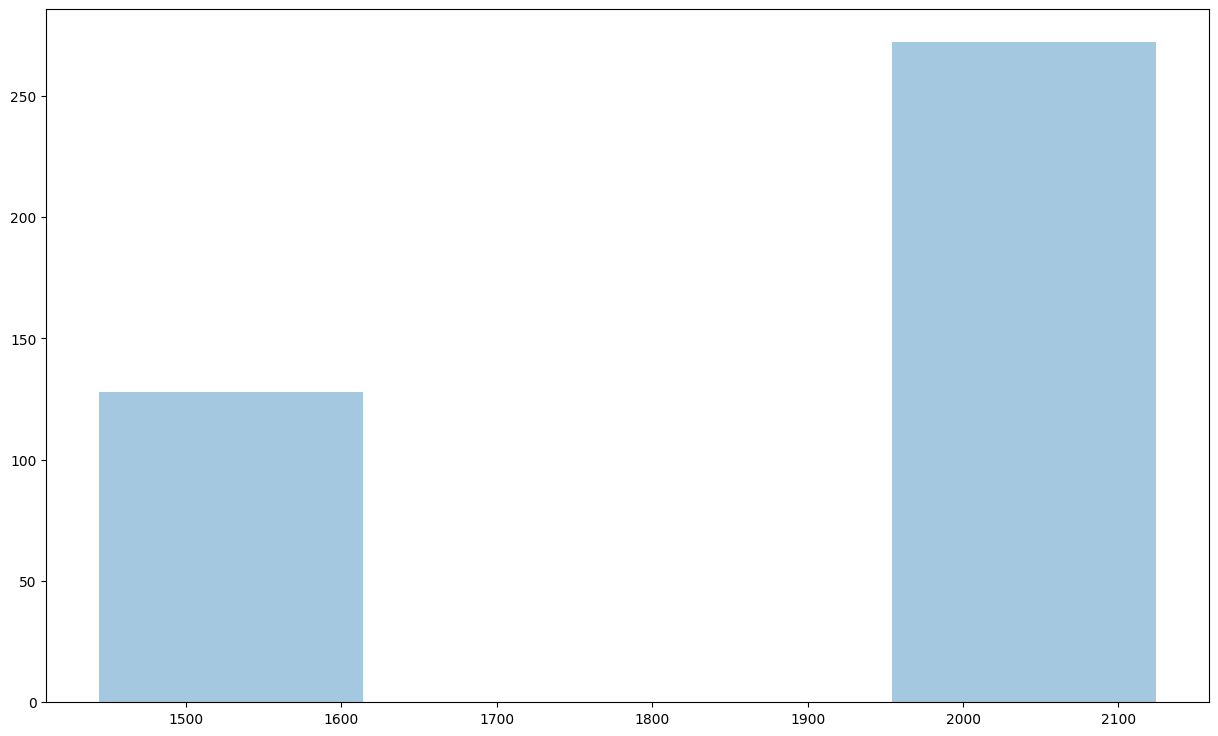

In [13]:
sns.distplot(a=h_list, kde=False)

C:\Users\Zeki\AppData\Local\Temp\ipykernel_18920\2211962285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=w_list, kde=False)


<Axes: >

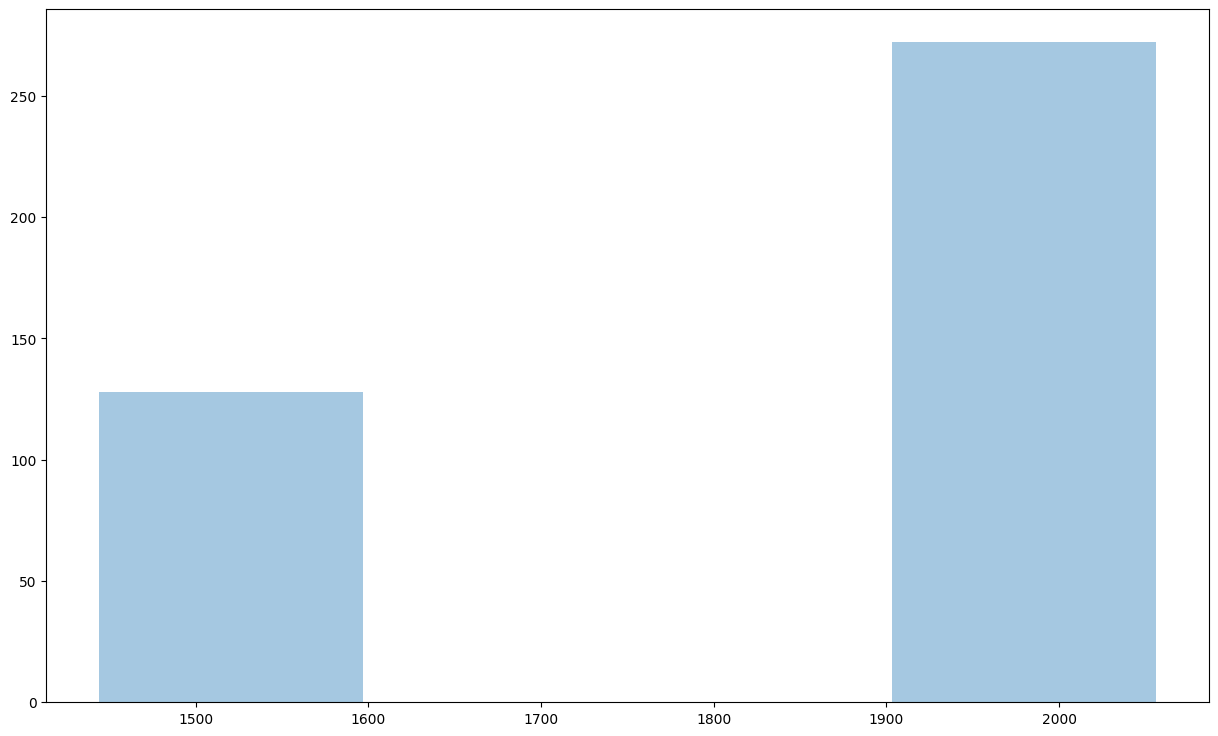

In [14]:
sns.distplot(a=w_list, kde=False)

### Data Transformation for Object Detection

In [15]:
import torchvision.transforms.functional as TF

def resize_img_label(image,label=(0.,0.),target_size=(256,256)):
    w_orig,h_orig = image.size   
    w_target,h_target = target_size
    cx, cy= label
    
    # resize image and label
    image_new = TF.resize(image,target_size)
    label_new= cx/w_orig*w_target, cy/h_orig*h_target
    
    return image_new,label_new

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)


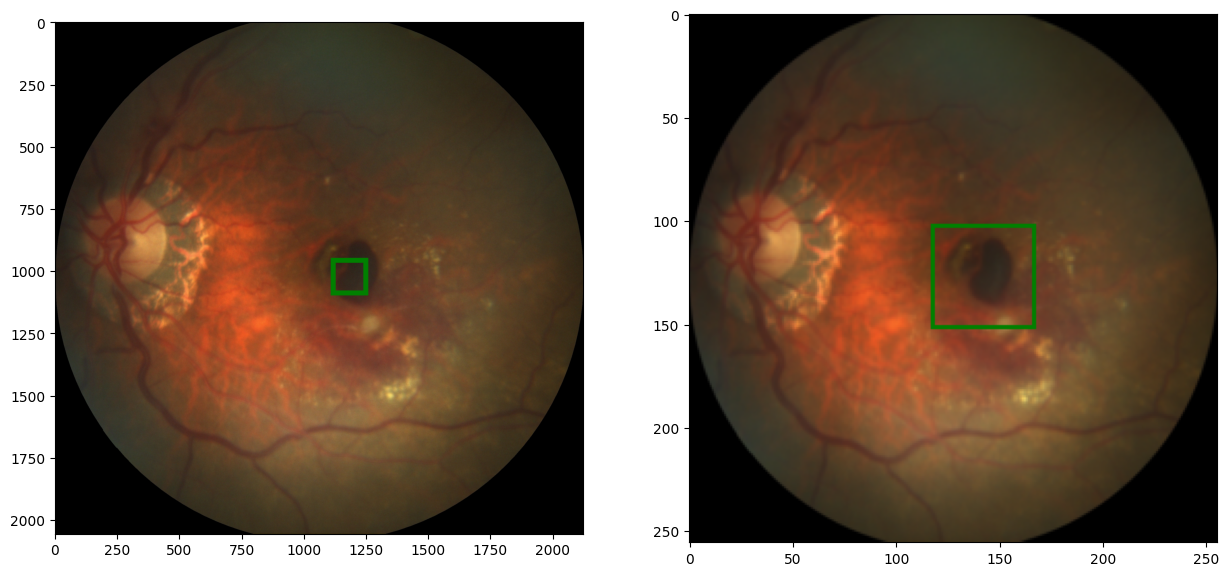

In [16]:
# load image
img, label=load_img_label(labels_df,1)   
print(img.size,label)

img_r,label_r=resize_img_label(img,label)
print(img_r.size,label_r)

plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(img_r,label_r)

In [17]:
def random_hflip(image,label):
    w,h=image.size
    x,y=label        

    image = TF.hflip(image)
    label = w-x, y
    return image,label

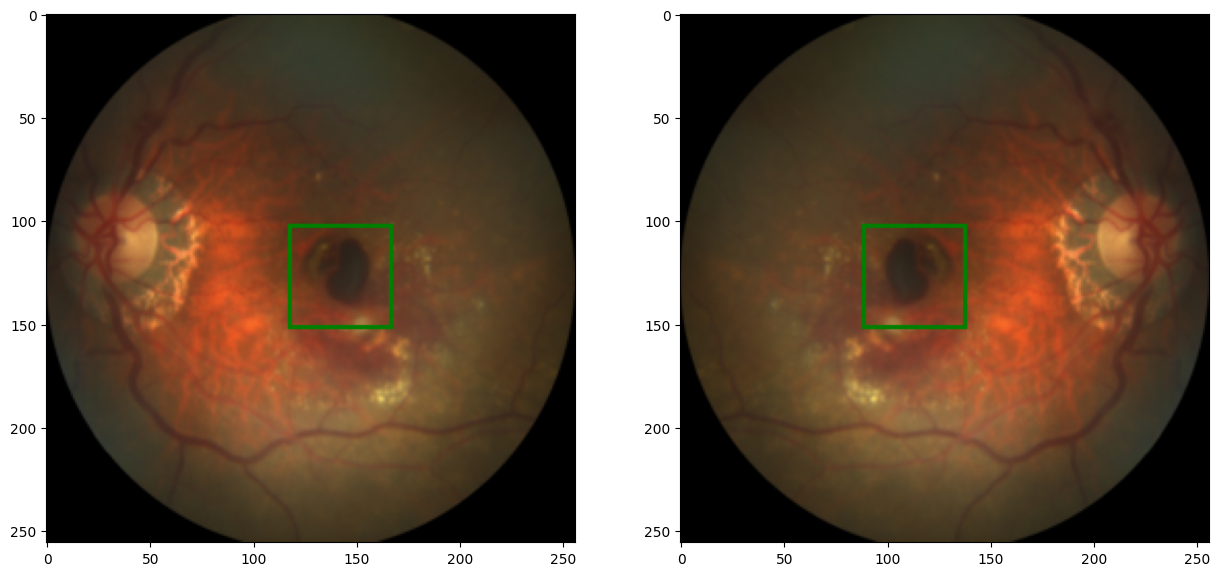

In [18]:
# load image and label
img, label=load_img_label(labels_df,1)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# horizantal flip
img_fh,label_fh=random_hflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fh,label_fh)

In [19]:
def random_vflip(image,label):
    w,h=image.size
    x,y=label

    image = TF.vflip(image)
    label = x, h-y
    return image, label

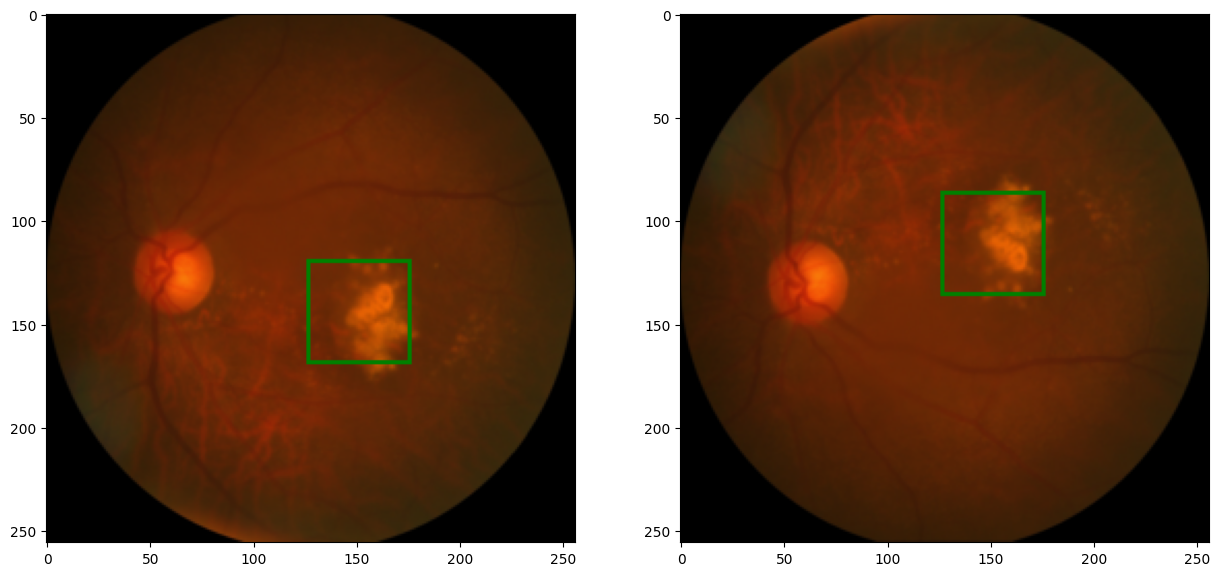

In [20]:
# load image and label
img, label=load_img_label(labels_df,7)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# vertical flip
img_fv,label_fv=random_vflip(img_r,label_r)

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_fv,label_fv)

In [21]:
import numpy as np
np.random.seed(1)

def random_shift(image,label,max_translate=(0.2,0.2)):
    w,h=image.size
    max_t_w, max_t_h=max_translate
    cx, cy=label

    # translate coeficinet, random [-1,1]
    trans_coef=np.random.rand()*2-1
    w_t = int(trans_coef*max_t_w*w)
    h_t = int(trans_coef*max_t_h*h)

    image=TF.affine(image,translate=(w_t, h_t),shear=0,angle=0,scale=1)
    label = cx+w_t, cy+h_t
        
    return image,label

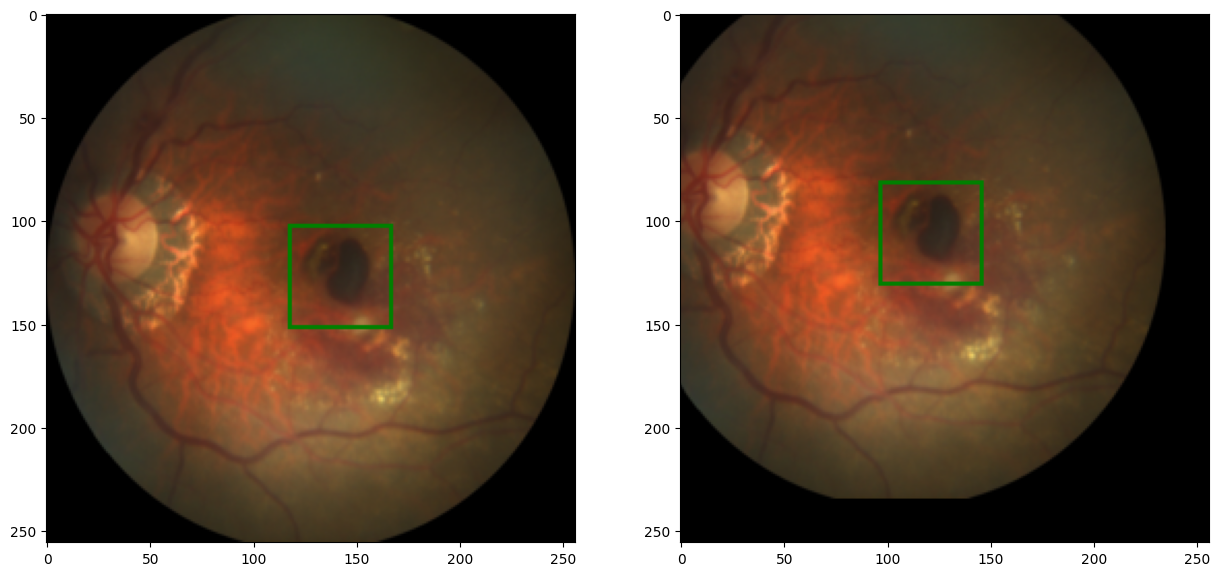

In [22]:
# load image and label
img, label=load_img_label(labels_df,1)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# horizantal flip
img_t,label_t=random_shift(img_r,label_r,max_translate=(.5,.5))

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [23]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])
    
    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])
        
    image=TF.to_tensor(image)
    return image, label

In [24]:
import random
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)   

params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.2, 0.2),
}
img_t,label_t=transformer(img,label,params)

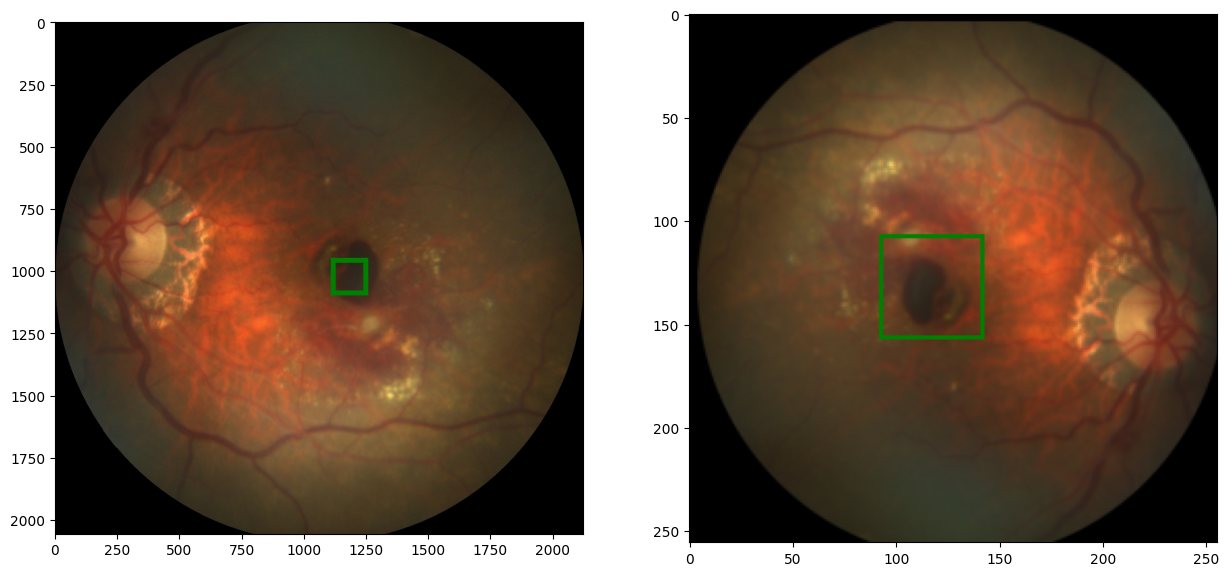

In [25]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

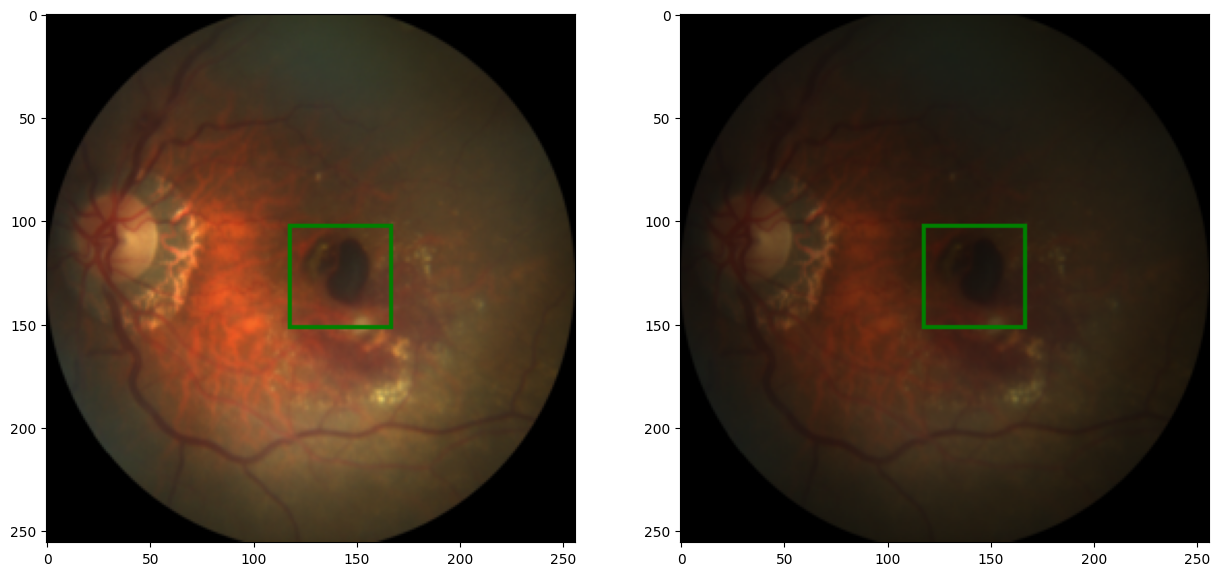

In [26]:
# load image and label
img, label=load_img_label(labels_df,1)   

# resize image and label
img_r,label_r=resize_img_label(img,label)

# adjust brightness
img_t=TF.adjust_brightness(img_r,brightness_factor=0.5)
label_t=label_r

plt.subplot(1,2,1)
show_img_label(img_r,label_r)
plt.subplot(1,2,2)
show_img_label(img_t,label_t)

In [27]:
# brightness
img_t=TF.adjust_contrast(img_r,contrast_factor=0.4)

# gamma correction
img_t=TF.adjust_gamma(img_r,gamma=1.4)

In [28]:
def scale_label(a,b):
    div = [ai/bi for ai,bi in zip(a,b)]
    return div

In [29]:
def transformer(image, label, params):
    image,label=resize_img_label(image,label,params["target_size"])

    if random.random() < params["p_hflip"]:
        image,label=random_hflip(image,label)
        
    if random.random() < params["p_vflip"]:            
        image,label=random_vflip(image,label)
        
    if random.random() < params["p_shift"]:                            
        image,label=random_shift(image,label, params["max_translate"])

    if random.random() < params["p_brightness"]:
        brightness_factor=1+(np.random.rand()*2-1)*params["brightness_factor"]
        image=TF.adjust_brightness(image,brightness_factor)

    if random.random() < params["p_contrast"]:
        contrast_factor=1+(np.random.rand()*2-1)*params["contrast_factor"]
        image=TF.adjust_contrast(image,contrast_factor)

    if random.random() < params["p_gamma"]:
        gamma=1+(np.random.rand()*2-1)*params["gamma"]
        image=TF.adjust_gamma(image,gamma)

    if params["scale_label"]:
        label=scale_label(label,params["target_size"])
        
    image=TF.to_tensor(image)
    return image, label

In [30]:
np.random.seed(0)
random.seed(0)

# load image and label
img, label=load_img_label(labels_df,1)
params={
    "target_size" : (256, 256),
    "p_hflip" : 1.0,
    "p_vflip" : 1.0,
    "p_shift" : 1.0,
    "max_translate": (0.5, 0.5),
    "p_brightness": 1.0,
    "brightness_factor": 0.8,
    "p_contrast": 1.0,
    "contrast_factor": 0.8,
    "p_gamma": 1.0,
    "gamma": 0.4,
    "scale_label": False,
}
img_t,label_t=transformer(img,label,params)

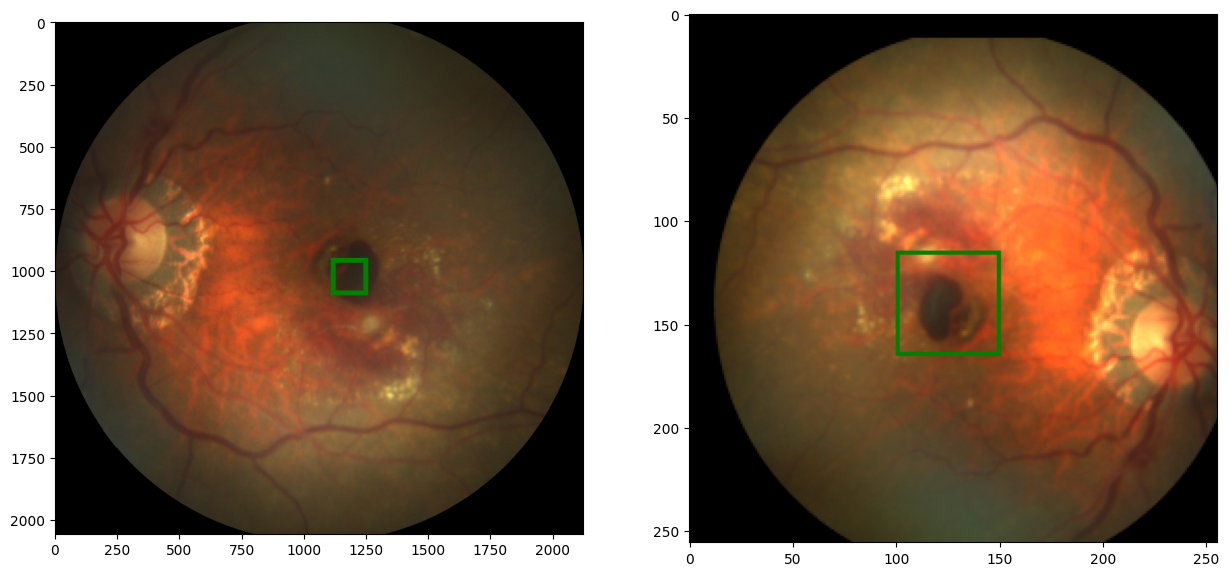

In [31]:
plt.subplot(1,2,1)
show_img_label(img,label,w_h=(150,150),thickness=20)
plt.subplot(1,2,2)
show_img_label(TF.to_pil_image(img_t),label_t)

In [32]:
def rescale_label(a,b):
    div = [ai*bi for ai,bi in zip(a,b)]
    return div

### Creating Custom Datasets

In [33]:
from torch.utils.data import Dataset
from PIL import Image

In [34]:
class AMD_dataset(Dataset):
    def __init__(self, path2data, transform, trans_params):      
        pass    
      
    def __len__(self):
        # return size of dataset
        return len(self.labels)
      
    def __getitem__(self, idx):
        pass

In [41]:
def __init__(self, path2data, transform, trans_params):      

    # full path of the labels file
    path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")

    # read and extract labels
    labels_df=pd.read_excel(path2labels,index_col="ID")
    self.labels = labels_df[["Fovea_X","Fovea_Y"]].values

    # extract ID and imgName columns
    self.imgName=labels_df["imgName"]
    self.ids=labels_df.index

    self.fullPath2img=[0]*len(self.ids)
    for id_ in self.ids:
        if self.imgName[id_][0]=="A":
            prefix="AMD"
        else:
            prefix="Non-AMD"
        self.fullPath2img[id_-1]=os.path.join(path2data,"Training400",prefix,self.imgName[id_])

    self.transform = transform
    self.trans_params=trans_params

In [42]:
def __getitem__(self, idx):
    # load PIL image
    image = Image.open(self.fullPath2img[idx])  
    label= self.labels[idx]

    # transform to tensor
    image,label = self.transform(image,label,self.trans_params)

    return image, label

In [43]:
AMD_dataset.__init__=__init__
AMD_dataset.__getitem__=__getitem__

In [44]:
trans_params_train={
    "target_size" : (256, 256),
    "p_hflip" : 0.5,
    "p_vflip" : 0.5,
    "p_shift" : 0.5,
    "max_translate": (0.2, 0.2),
    "p_brightness": 0.5,
    "brightness_factor": 0.2,
    "p_contrast": 0.5,
    "contrast_factor": 0.2,
    "p_gamma": 0.5,
    "gamma": 0.2,
    "scale_label": True,    
}

In [45]:
trans_params_val={
    "target_size" : (256, 256),
    "p_hflip" : 0.0,
    "p_vflip" : 0.0,
    "p_shift" : 0.0,
    "p_brightness": 0.0,
    "p_contrast": 0.0,
    "p_gamma": 0.0,
    "gamma": 0.0,
    "scale_label": True,    
}

In [46]:
amd_ds1=AMD_dataset(path2data,transformer,trans_params_train)
amd_ds2=AMD_dataset(path2data,transformer,trans_params_val)

In [47]:
from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(amd_ds1))

In [48]:
indices

range(0, 400)

In [49]:
for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))

320
----------
80


In [50]:
train_index

array([336,  64,  55, 106, 300, 229, 122, 373, 395, 325, 380, 253,  56,
         8, 190, 146, 135, 390, 264, 364, 250,  63, 312, 159, 283, 340,
        81, 349, 153, 295,  96,  89, 296,  21, 365, 216, 259,  49, 238,
       343,  92, 223, 234, 232, 377, 142,  22, 252, 350, 168, 150, 393,
        66, 240, 218, 101, 311, 194, 326,  17, 164, 186,  30, 114, 263,
       103, 358, 245, 235, 116, 330, 120, 289, 112, 215, 136, 275, 126,
       198, 299, 281, 133,  33, 378, 162,  34, 231,  97,  85,  61, 167,
       282, 200, 391, 230, 287, 108,  46, 320, 396, 224,  73, 137, 381,
       220, 210,  29, 181, 360, 271,  51, 328, 352,  27,   2, 217, 156,
       212, 376, 221, 138, 236, 219, 274, 278, 307, 239,  35, 204, 392,
        67,  24, 332,  44, 241, 129,  93, 111, 166, 389, 383, 342,  40,
        18, 284,  79, 249, 394,  71,  13, 367, 213, 385, 388, 228, 160,
       104, 161,  83, 189, 397, 118, 254, 188, 208, 375, 110, 149, 157,
       152,  16, 269,  75, 109, 327, 205, 315, 139, 237, 319, 24

In [51]:
from torch.utils.data import Subset

train_ds=Subset(amd_ds1,train_index)
print(len(train_ds))

val_ds=Subset(amd_ds2,val_index)
print(len(val_ds))

320
80


In [52]:
# fix random seed
np.random.seed(0)

In [53]:
def show(img,label=None):
    npimg = img.numpy().transpose((1,2,0))
    plt.imshow(npimg)
    if label is not None:
        label=rescale_label(label,img.shape[1:])        
        x,y=label
        plt.plot(x,y,'b+',markersize=20) 

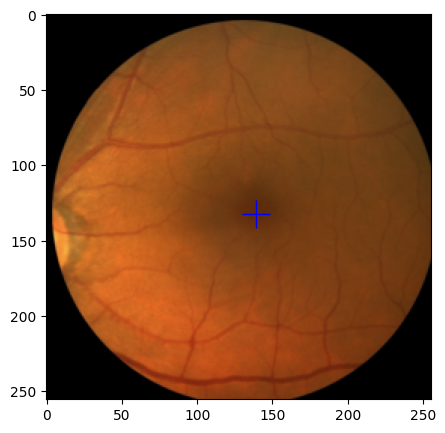

In [54]:
plt.figure(figsize=(5,5))
for img,label in train_ds:
    show(img,label)
    break

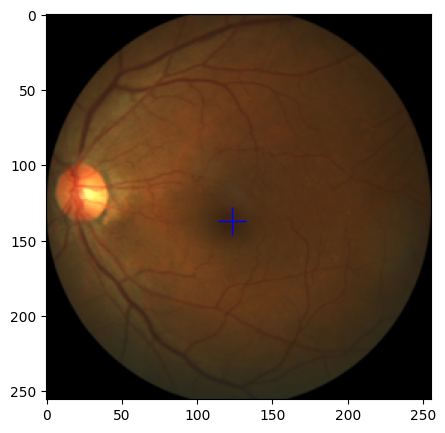

In [55]:
plt.figure(figsize=(5,5))
for img,label in val_ds:
    show(img,label)
    break

In [56]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [57]:
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(label_b)
    break

torch.Size([8, 3, 256, 256]) torch.float32
[tensor([0.5450, 0.4605, 0.4494, 0.5297, 0.8068, 0.4309, 0.5608, 0.4341],
       dtype=torch.float64), tensor([0.5765, 0.5097, 0.5199, 0.5005, 0.6587, 0.5306, 0.5182, 0.5083],
       dtype=torch.float64)]


In [59]:
import torch
# extract a batch from trainin data
for img_b, label_b in train_dl:
    print(img_b.shape,img_b.dtype)

    # convert list to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([8, 3, 256, 256]) torch.float32
torch.Size([8, 2]) torch.float32


In [60]:
for img_b, label_b in val_dl:
    print(img_b.shape,img_b.dtype)

    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    print(label_b.shape,label_b.dtype)
    break

torch.Size([16, 3, 256, 256]) torch.float32
torch.Size([16, 2]) torch.float32


### Creating the Model

In [61]:
import torch.nn as nn
import torch.nn.functional as F

In [62]:
class Net(nn.Module):
    def __init__(self, params):
        super(Net, self).__init__()
    
    def forward(self, x):
        return x

In [63]:
def __init__(self, params):
    super(Net, self).__init__()

    C_in,H_in,W_in=params["input_shape"]
    init_f=params["initial_filters"] 
    num_outputs=params["num_outputs"] 

    self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=2,padding=1)
    self.conv2 = nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3,stride=1,padding=1)
    self.conv3 = nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3,padding=1)
    self.conv4 = nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3,padding=1)
    self.conv5 = nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3,padding=1)
    self.fc1 = nn.Linear(16*init_f, num_outputs)

In [64]:
def forward(self, x):
    identity=F.avg_pool2d(x,4,4)
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv3(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)
    
    identity=F.avg_pool2d(x,2,2)
    x = F.relu(self.conv4(x))
    x = F.max_pool2d(x, 2, 2)
    x = torch.cat((x, identity), dim=1)

    x = F.relu(self.conv5(x))

    x=F.adaptive_avg_pool2d(x,1)
    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    return x    

In [65]:
Net.__init__=__init__
Net.forward=forward

In [66]:
params_model={
        "input_shape": (3,256,256),
        "initial_filters": 16, 
        "num_outputs": 2,
            }

model = Net(params_model)

In [67]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    model=model.to(device)

In [68]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=2, bias=True)
)


### Defining Loss, Optimizer and IOU Metric

In [69]:
loss_func = nn.SmoothL1Loss(reduction="sum")    

In [70]:
n,c=8,2
y = 0.5 * torch.ones(n, c, requires_grad=True)
print(y.shape)

torch.Size([8, 2])


In [71]:
y 

tensor([[0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000]], grad_fn=<MulBackward0>)

In [72]:
target = torch.zeros(n, c, requires_grad=False)
print(target.shape)

loss = loss_func(y, target)
print(loss.item())


torch.Size([8, 2])
2.0


In [73]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

In [74]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


In [75]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

In [76]:
for i in range(100):
    lr_scheduler.step(1)

Epoch 00022: reducing learning rate of group 0 to 1.5000e-04.
Epoch 00043: reducing learning rate of group 0 to 7.5000e-05.
Epoch 00064: reducing learning rate of group 0 to 3.7500e-05.
Epoch 00085: reducing learning rate of group 0 to 1.8750e-05.


In [77]:
def cxcy2bbox(cxcy,w=50./256,h=50./256):
    # define two new tensors for w and h
    w_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*w
    h_tensor=torch.ones(cxcy.shape[0],1,device=cxcy.device)*h

    # extract cx and cy
    cx=cxcy[:,0].unsqueeze(1)
    cy=cxcy[:,1].unsqueeze(1)
    
    # concat cx,cy,w and h
    boxes=torch.cat((cx,cy, w_tensor, h_tensor), -1) # cx,cy,w,h
    
    return torch.cat((boxes[:, :2] - boxes[:, 2:]/2, # xmin, ymin
                     boxes[:, :2] + boxes[:, 2:]/2), 1) # xmax, ymax

In [78]:
torch.manual_seed(0)

cxcy=torch.rand(1,2)
print(cxcy)
print("center:", cxcy*256)

tensor([[0.4963, 0.7682]])
center: tensor([[127.0417, 196.6648]])


In [79]:
bb=cxcy2bbox(cxcy)
print("bounding box", bb*256)

bounding box tensor([[102.0417, 171.6648, 152.0417, 221.6648]])


In [80]:
import torchvision
def metrics_batch(output, target):
    output=cxcy2bbox(output)
    target=cxcy2bbox(target)
    
    iou=torchvision.ops.box_iou(output, target)
    return torch.diagonal(iou, 0).sum().item()

In [81]:
n,c=8,2
target = torch.rand(n, c, device=device)
target=cxcy2bbox(target)
metrics_batch(target,target)

8.0

In [82]:
def loss_batch(loss_func, output, target, opt=None):   
    # get loss 
    loss = loss_func(output, target)
    
    # get performance metric
    metric_b = metrics_batch(output,target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [83]:
for xb,label_b in train_dl:
    # convert to tensor
    label_b=torch.stack(label_b,1)
    label_b=label_b.type(torch.float32)
    label_b=label_b.to(device)
 
    l,m=loss_batch(loss_func,label_b,label_b)
    print(l,m)
    break

0.0 8.0


### Training and Evaluation of the Model

In [84]:
def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        # convert to tensor
        yb=torch.stack(yb,1)
        yb=yb.type(torch.float32).to(device)
        
        # get model output
        output=model(xb.to(device))
        
        # get loss per batch
        loss_b,metric_b=loss_batch(loss_func, output, yb, opt)
        
        # update running loss
        running_loss+=loss_b
        
        # update running metric
        if metric_b is not None:
            running_metric+=metric_b

    # average loss value
    loss=running_loss/float(len_data)
    
    # average metric value
    metric=running_metric/float(len_data)
    
    return loss, metric

In [85]:
import copy
def train_val(model, params):
    # extract parameters
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    # history of loss values in each epoch
    loss_history={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    metric_history={
        "train": [],
        "val": [],
    }    
    
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    # initialize best loss to a large value
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        # get current learning rate
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        # train the model
        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        # collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate the model
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        # collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            # store weights into a local file
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        # learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            

        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history 

In [86]:
loss_func=nn.SmoothL1Loss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=1e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models_sngdet/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 10,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights_smoothl1.pt",
}

# train and validate the model
model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/9, current lr=0.0001
Copied best model weights!
train loss: 0.079024, accuracy: 13.27
val loss: 0.019765, accuracy: 23.30
----------
Epoch 1/9, current lr=0.0001
Copied best model weights!
train loss: 0.016703, accuracy: 28.20
val loss: 0.011116, accuracy: 50.82
----------
Epoch 2/9, current lr=0.0001
Copied best model weights!
train loss: 0.011594, accuracy: 34.46
val loss: 0.010186, accuracy: 45.14
----------
Epoch 3/9, current lr=0.0001
Copied best model weights!
train loss: 0.011146, accuracy: 35.51
val loss: 0.009694, accuracy: 58.82
----------
Epoch 4/9, current lr=0.0001
Copied best model weights!
train loss: 0.009496, accuracy: 38.05
val loss: 0.009574, accuracy: 48.33
----------
Epoch 5/9, current lr=0.0001
Copied best model weights!
train loss: 0.008675, accuracy: 40.23
val loss: 0.009435, accuracy: 59.99
----------
Epoch 6/9, current lr=0.0001
Copied best model weights!
train loss: 0.007955, accuracy: 39.15
val loss: 0.009374, accuracy: 46.82
----------
Epoch 7/9, cu

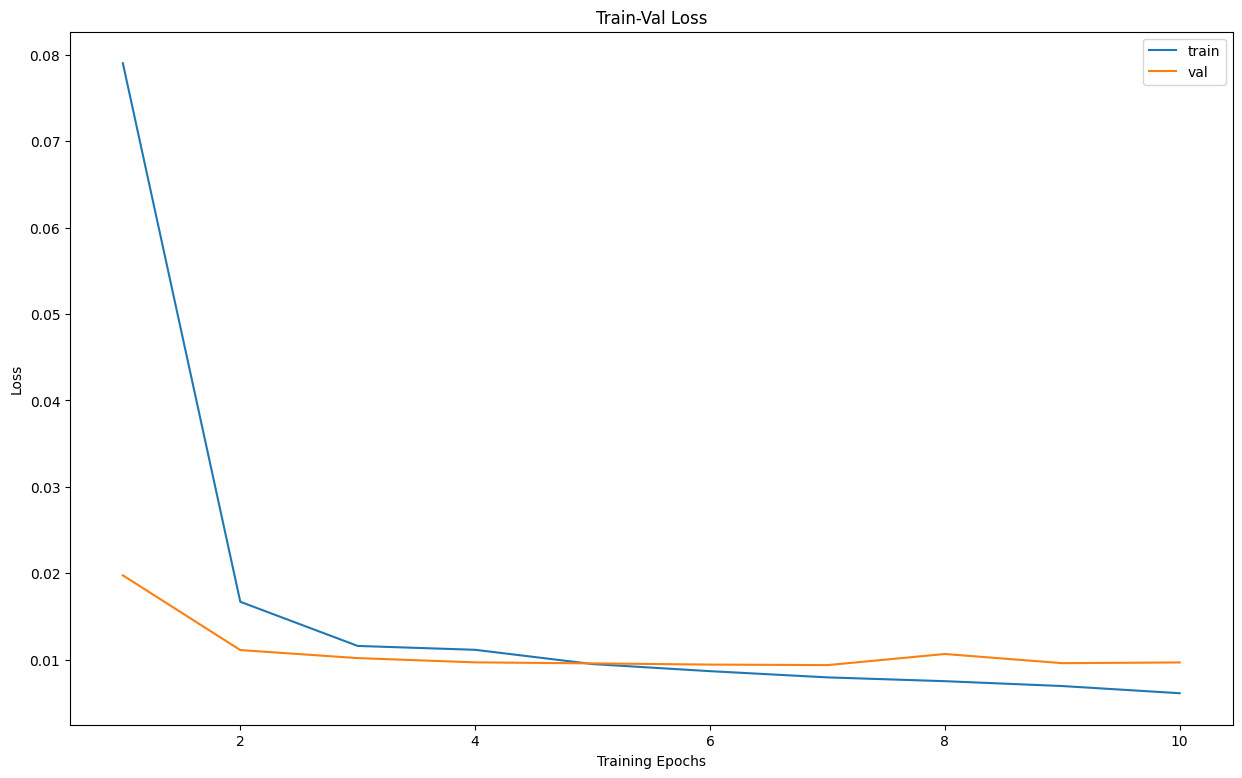

In [87]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

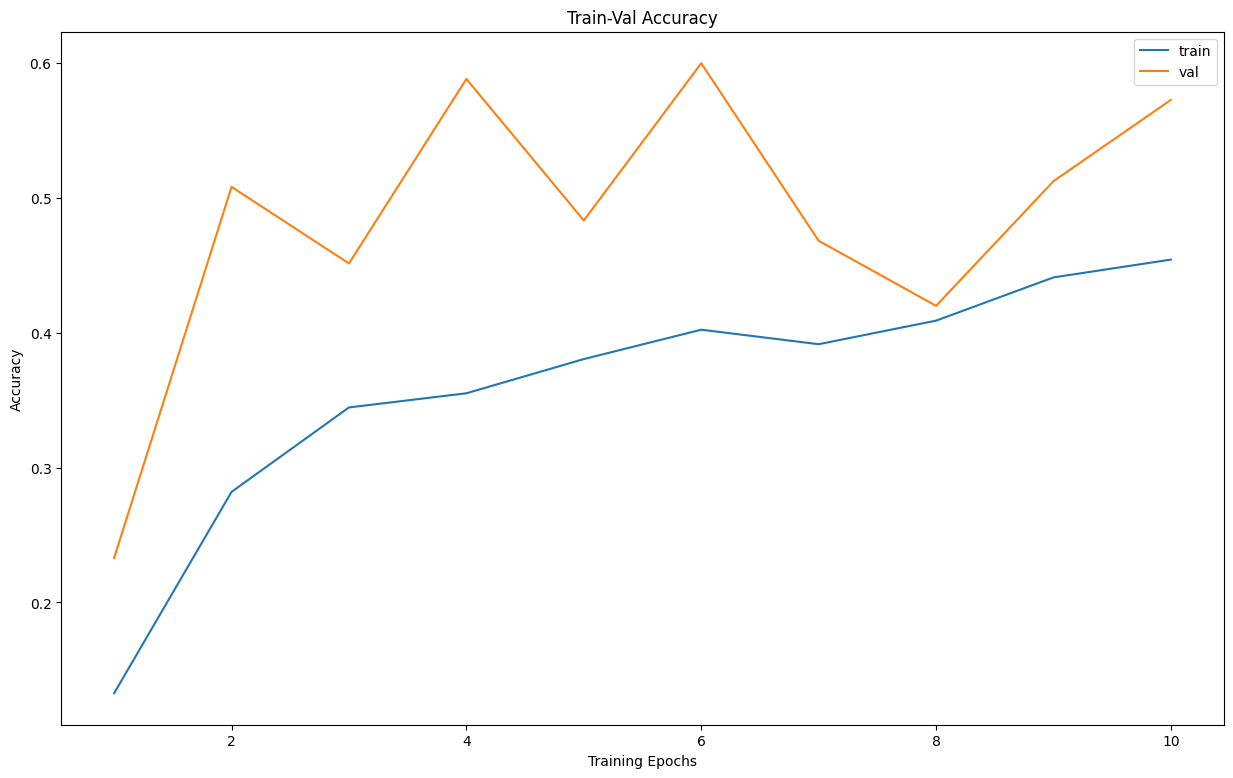

In [88]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

In [89]:
from PIL import ImageDraw
import numpy as np
import torchvision.transforms.functional as tv_F
np.random.seed(0)

import matplotlib.pylab as plt

In [90]:
def show_tensor_2labels(img,label1,label2,w_h=(50,50)): 
    label1=rescale_label(label1,img.shape[1:])
    label2=rescale_label(label2,img.shape[1:])
    img=tv_F.to_pil_image(img) 

    w,h=w_h 
    cx,cy=label1
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="green",width=2)

    cx,cy=label2
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)),outline="red",width=2)

    plt.imshow(np.asarray(img))

In [91]:
# get random samples
rndInds=np.random.randint(len(val_ds),size=10)
print(rndInds)

[44 47 64 67 67  9 21 36 70 12]


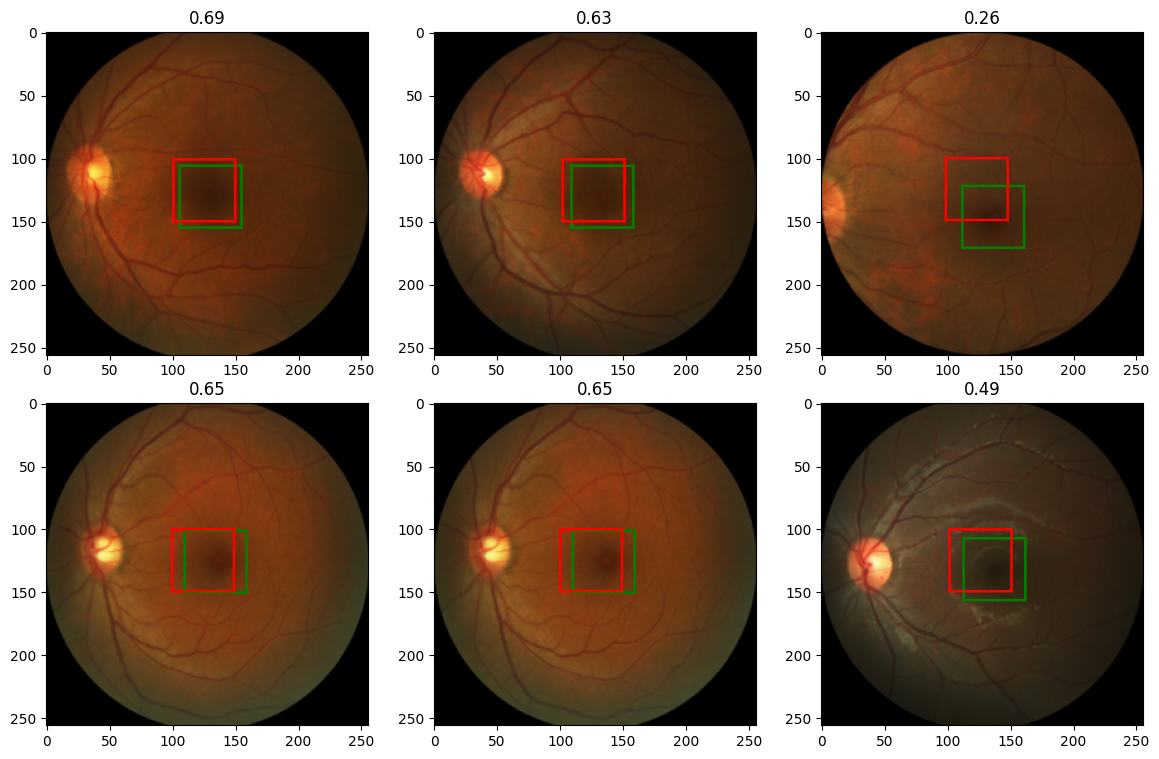

In [92]:
plt.subplots_adjust(wspace=0.0, hspace=0.15)

for i,rndi in enumerate(rndInds):
    img,label=val_ds[rndi]
    h,w=img.shape[1:]
    with torch.no_grad():
        label_pred=model(img.unsqueeze(0).to(device))[0].cpu()
        
    plt.subplot(2,3,i+1)
    show_tensor_2labels(img,label,label_pred)
    
    # calculate IOU 
    label_bb=cxcy2bbox(torch.tensor(label).unsqueeze(0))
    label_pred_bb=cxcy2bbox(label_pred.unsqueeze(0))
    iou=torchvision.ops.box_iou(label_bb, label_pred_bb)        
    plt.title("%.2f" %iou.item())

    if i>4:
        break

(2124, 2056) (1182.26427759023, 1022.01884158854)
(256, 256) (142.4951295024006, 127.25526432230848)
torch.Size([3, 256, 256])


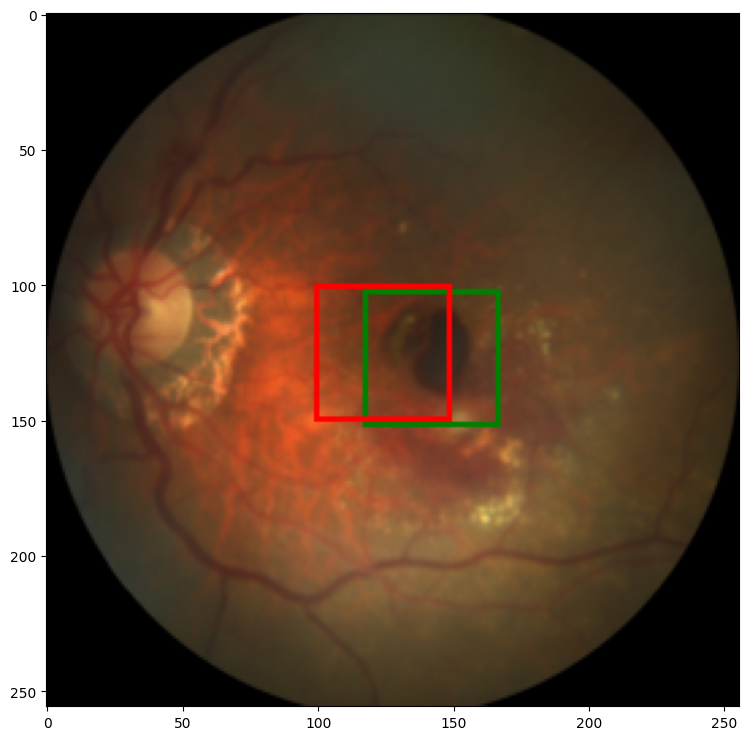

In [93]:
path2labels=os.path.join(path2data,"Training400","Fovea_location.xlsx")
labels_df=pd.read_excel(path2labels,index_col="ID")

img,label=load_img_label(labels_df,1)   
print(img.size, label)

img,label=resize_img_label(img,label,target_size=(256,256))
print(img.size, label)

img=TF.to_tensor(img)
label=scale_label(label,(256,256))
print(img.shape)

with torch.no_grad():
    label_pred=model(img.unsqueeze(0).to(device))[0].cpu()

show_tensor_2labels(img,label,label_pred)